In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wrangle as w
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from importlib import reload

### Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.


In [35]:
reload(w)
zillow_df = w.wrangle_zillow()
zillow_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4274594 entries, 0 to 4301224
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   bed_count           int64  
 1   bath_count          float64
 2   calc_finished_sqft  float64
 3   tax_value           float64
 4   year_built          int64  
 5   taxes               float64
 6   fips                float64
dtypes: float64(5), int64(2)
memory usage: 260.9 MB


In [36]:
train,validate,test = w.tvt_split(zillow_df)


In [37]:
scalar_features = ['year_built','taxes','calc_finished_sqft']
xtrain = train[scalar_features]
ytrain = train.tax_value

In [38]:
scaler = RobustScaler()
scaler.fit(xtrain)
scaled_xtrain = scaler.transform(xtrain).T

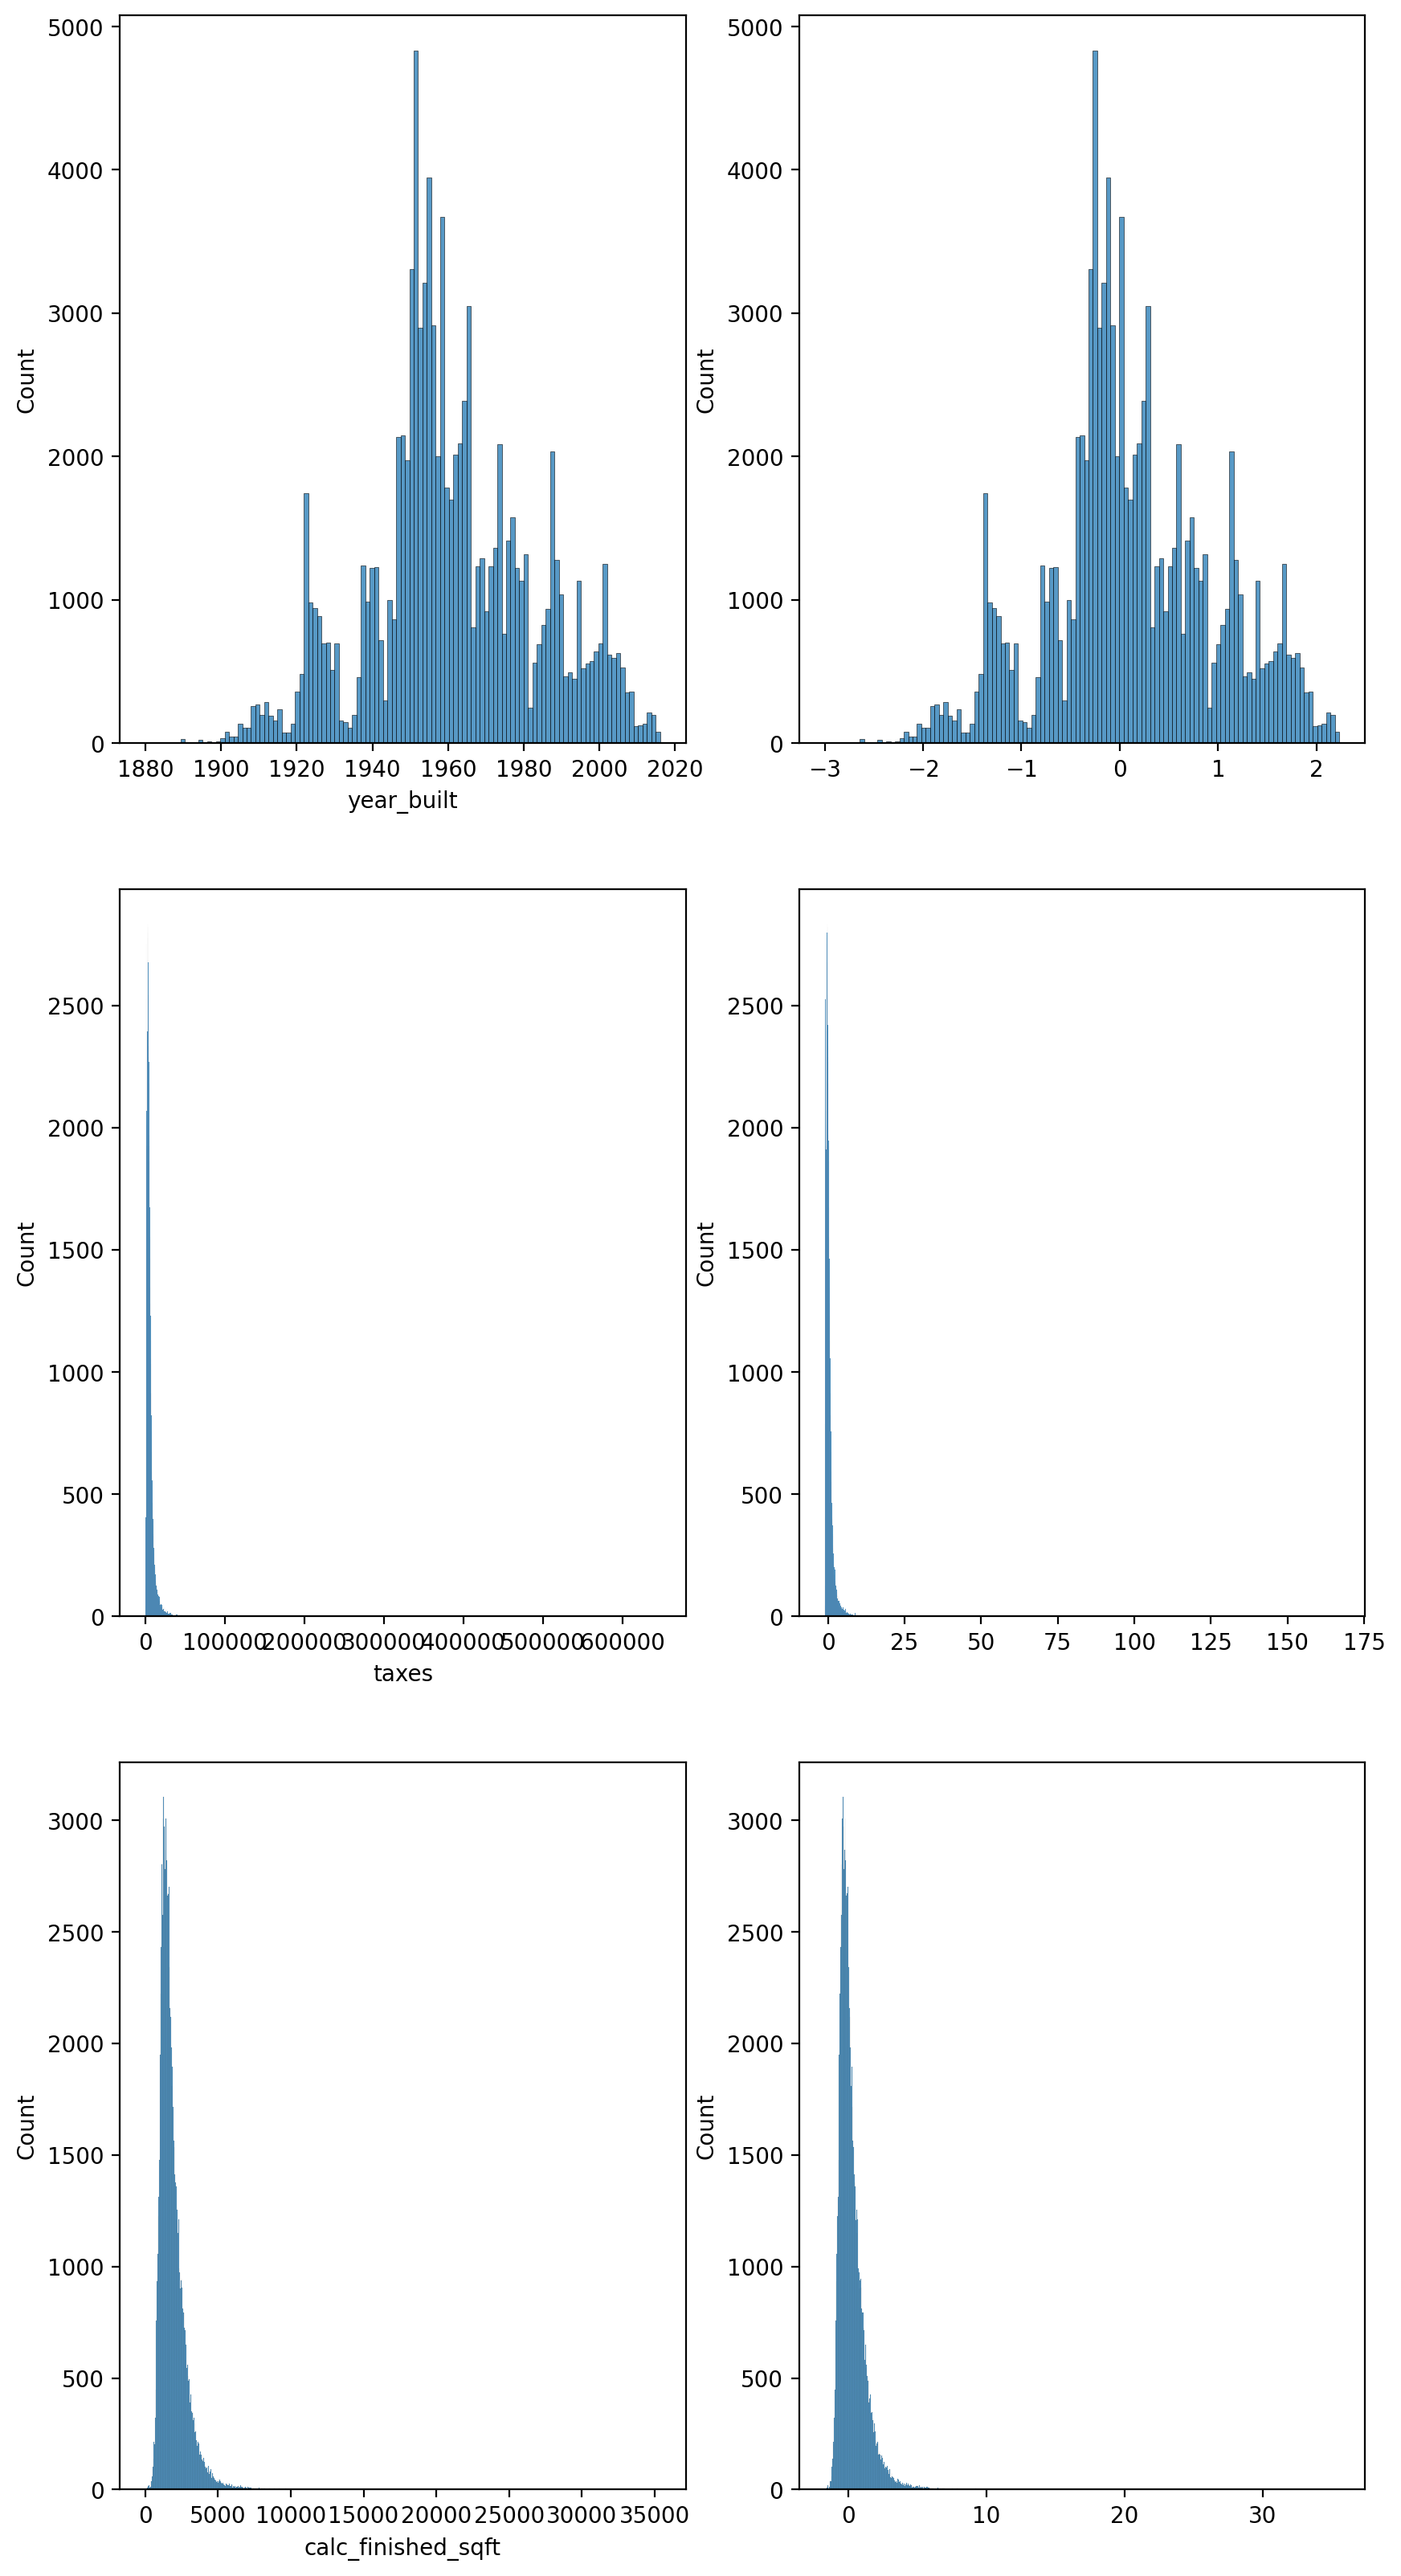

In [39]:
plt.figure(figsize=(10,20))
for i,v in enumerate(xtrain):
    plt_no = i * 2 + 1
    plt.subplot(3,2,plt_no)
    sns.histplot(xtrain[v].iloc[:100000])
    plt.subplot(3,2,plt_no+1)
    sns.histplot(scaled_xtrain[i][:100000])

In [40]:
scaler = MinMaxScaler()
scaler.fit(xtrain)
scaled_xtrain = scaler.transform(xtrain).T

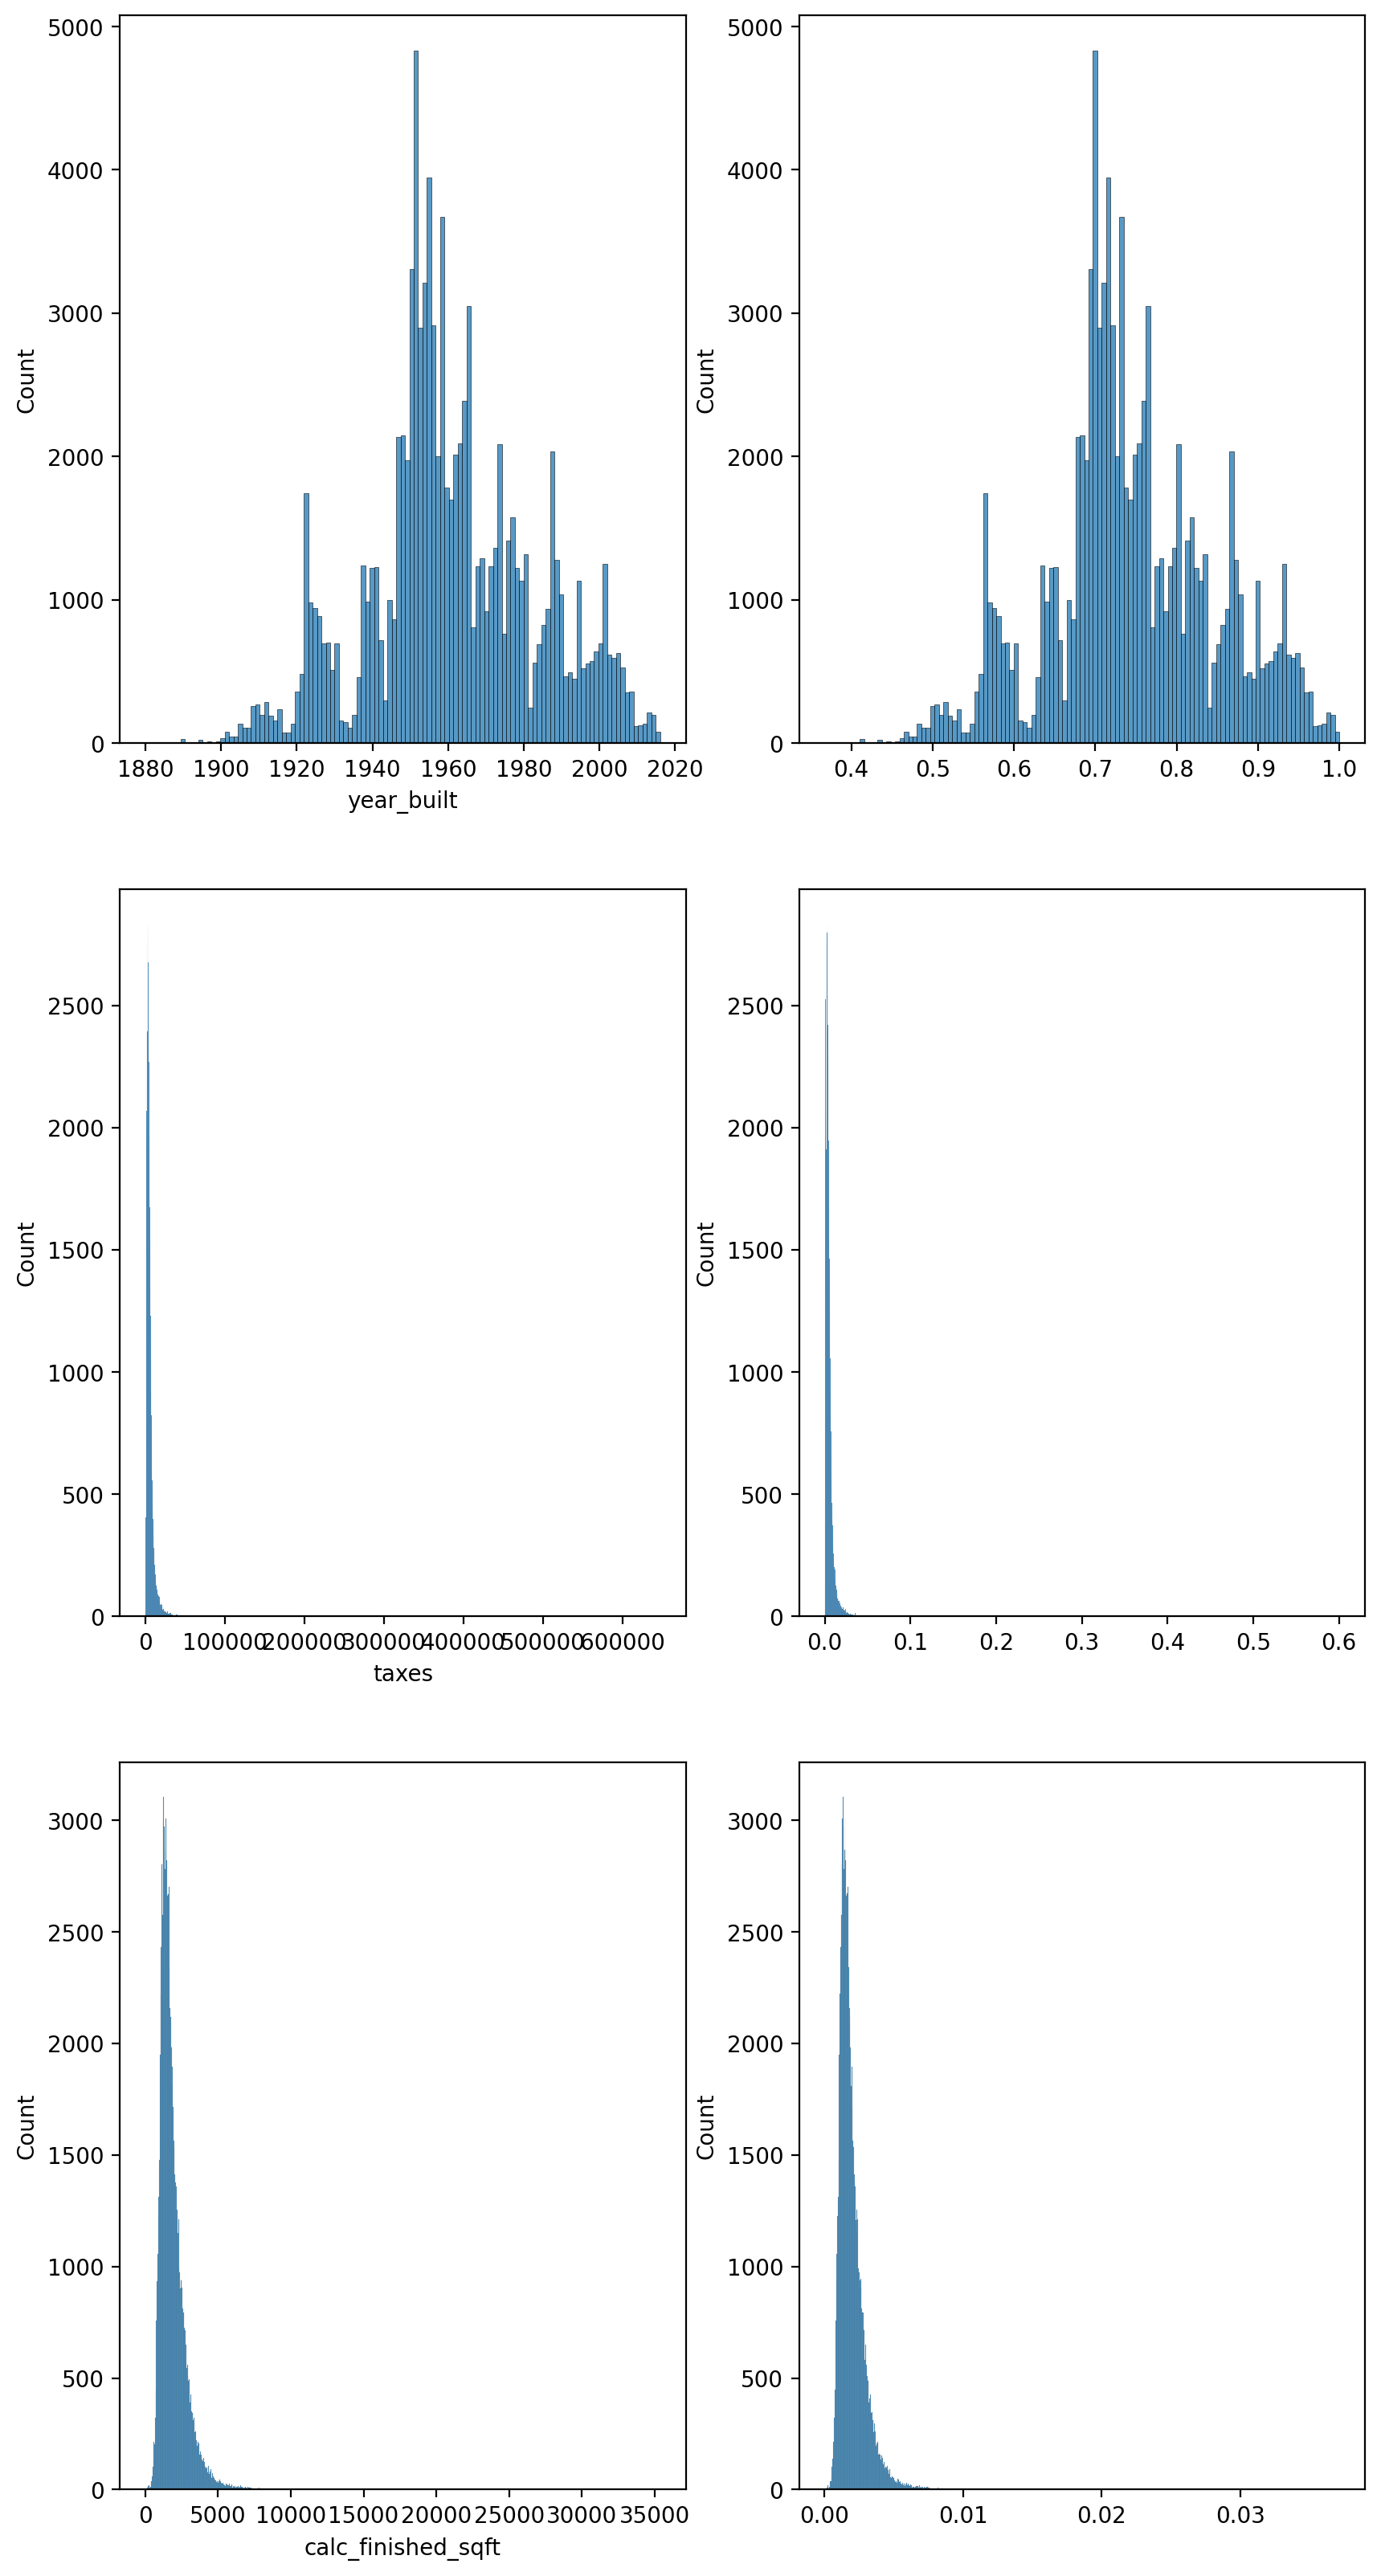

In [41]:
plt.figure(figsize=(10,20))
for i,v in enumerate(xtrain):
    plt_no = i * 2 + 1
    plt.subplot(3,2,plt_no)
    sns.histplot(xtrain[v].iloc[:100000])
    plt.subplot(3,2,plt_no+1)
    sns.histplot(scaled_xtrain[i][:100000])

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [53]:
inv_t = scaler.inverse_transform(scaled_xtrain.T)
np_train = xtrain.to_numpy()
(np_train - inv_t < .0001).all()
#Data is mostly the same, accounting for some float weirdness.

True

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [63]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit(xtrain)
scaled_xtrain = quantile_transformer.transform(xtrain).T


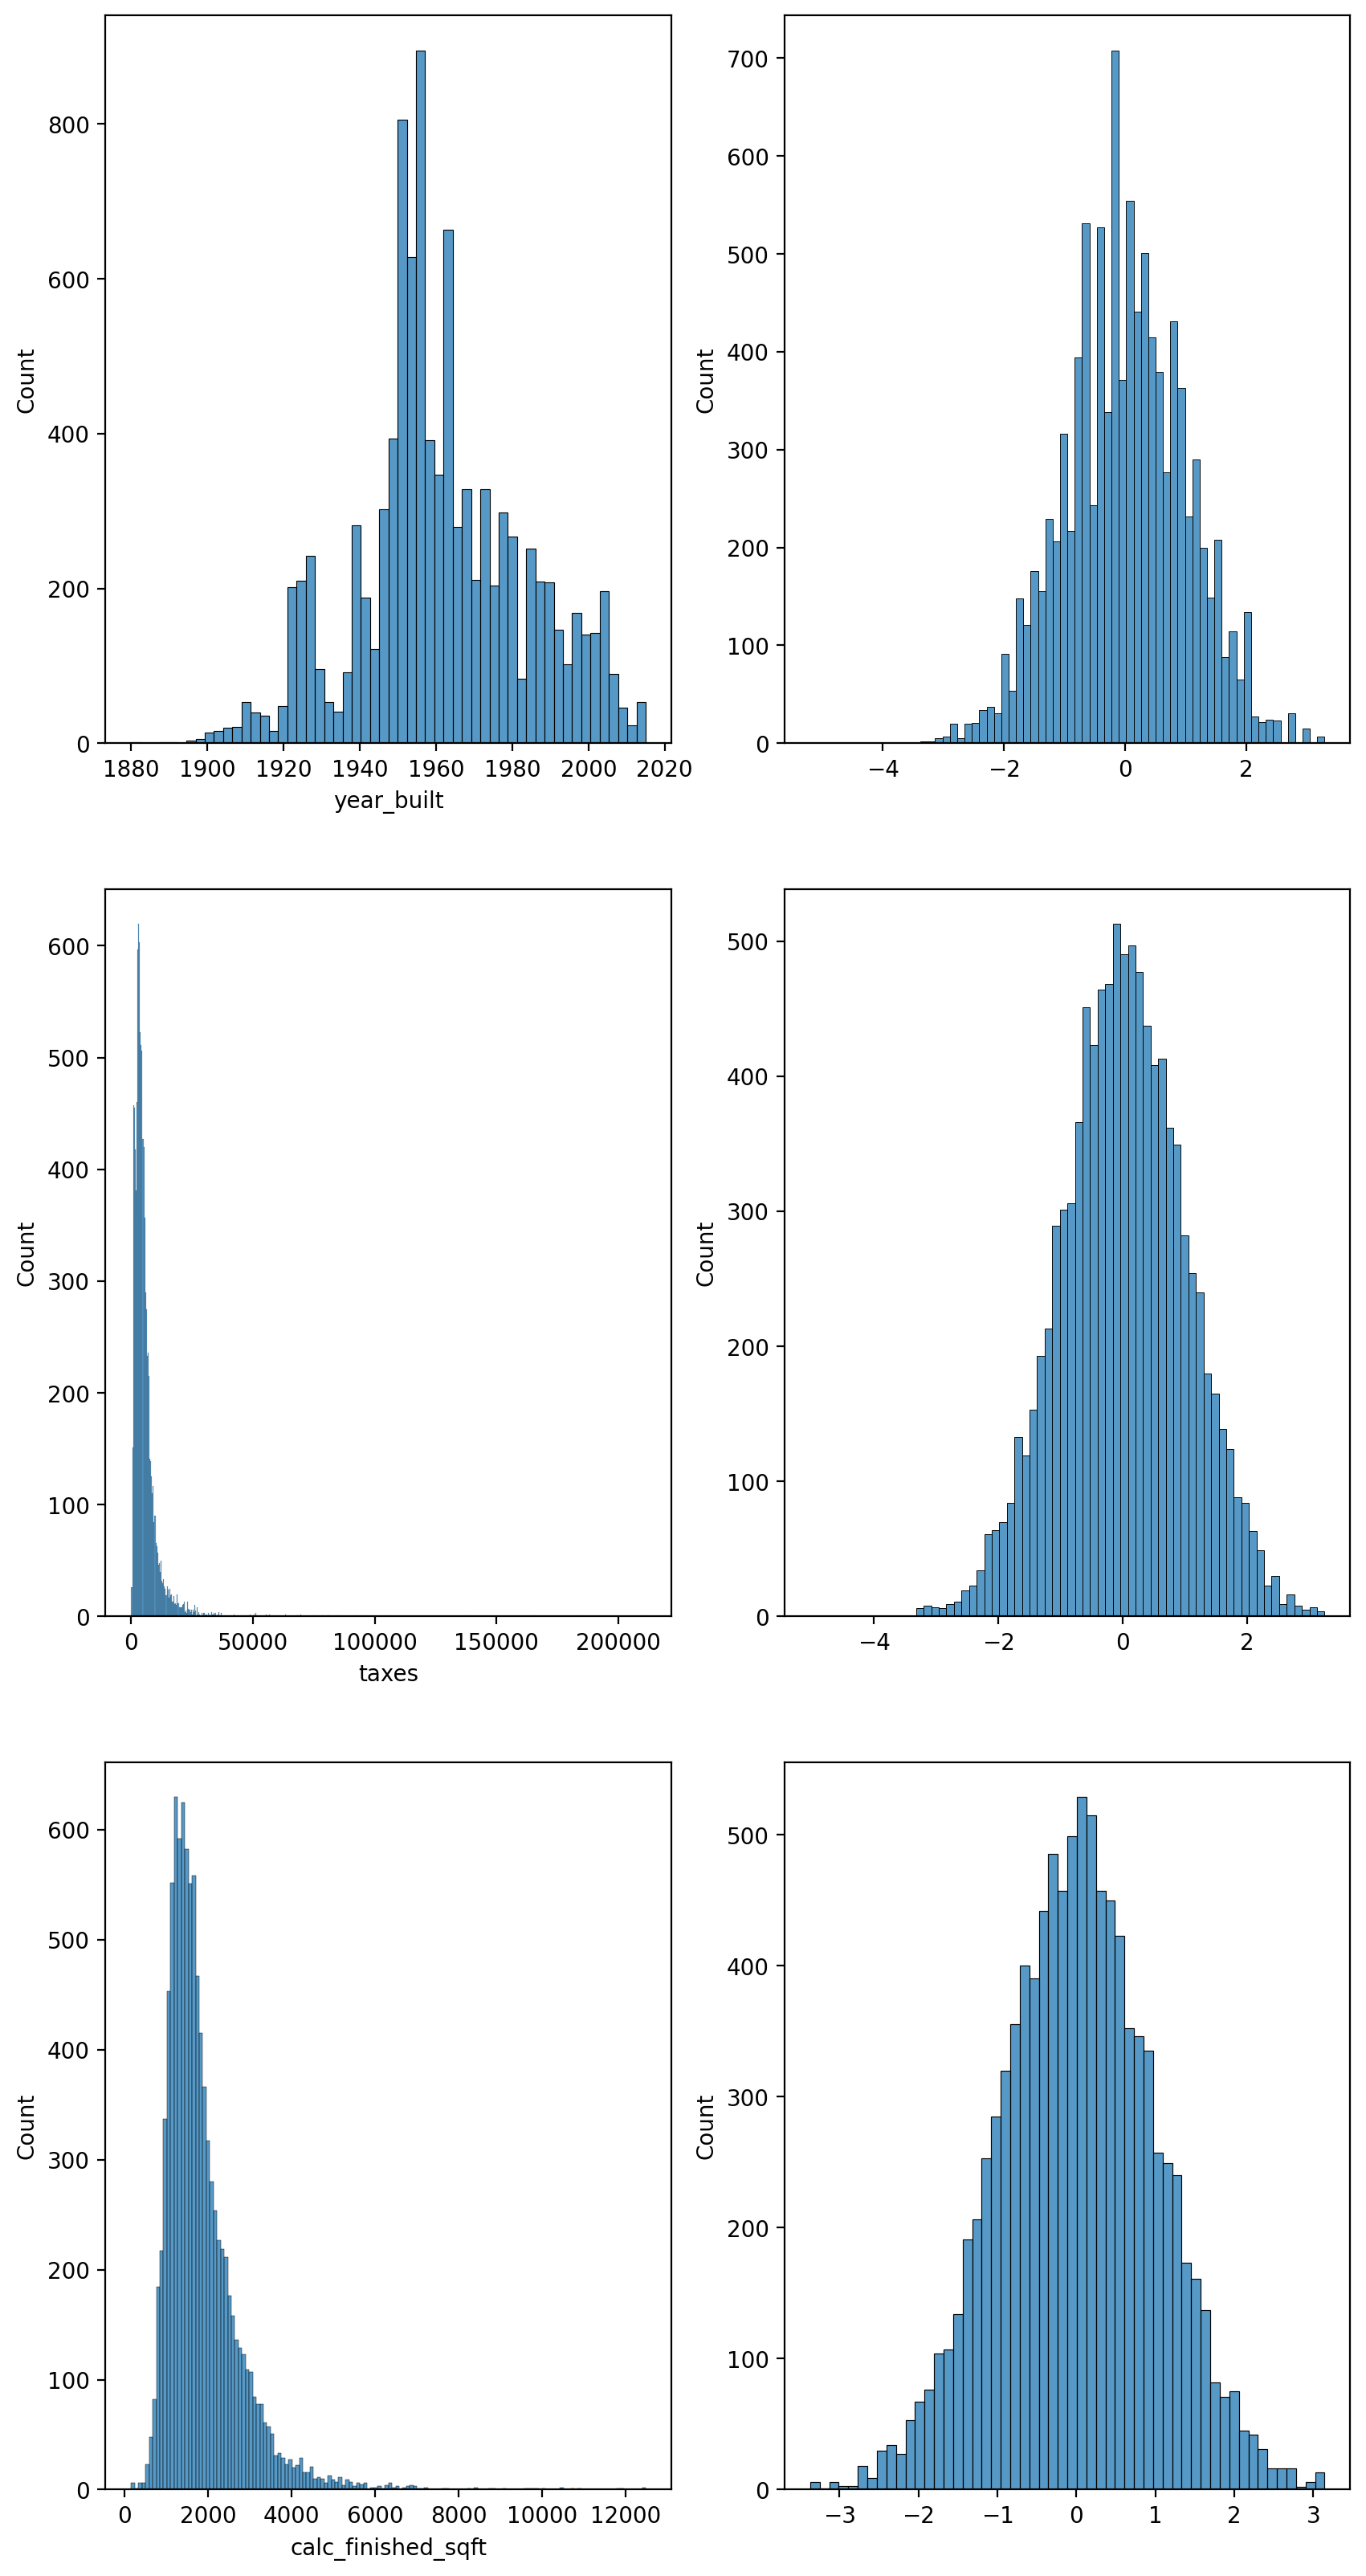

In [64]:
plt.figure(figsize=(10,20))
for i,v in enumerate(xtrain):
    plt_no = i * 2 + 1
    plt.subplot(3,2,plt_no)
    sns.histplot(xtrain[v].iloc[:10000])
    plt.subplot(3,2,plt_no+1)
    sns.histplot(scaled_xtrain[i][:10000])

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


In [67]:
quantile_transformer = QuantileTransformer()
quantile_transformer.fit(xtrain)
scaled_xtrain = quantile_transformer.transform(xtrain).T


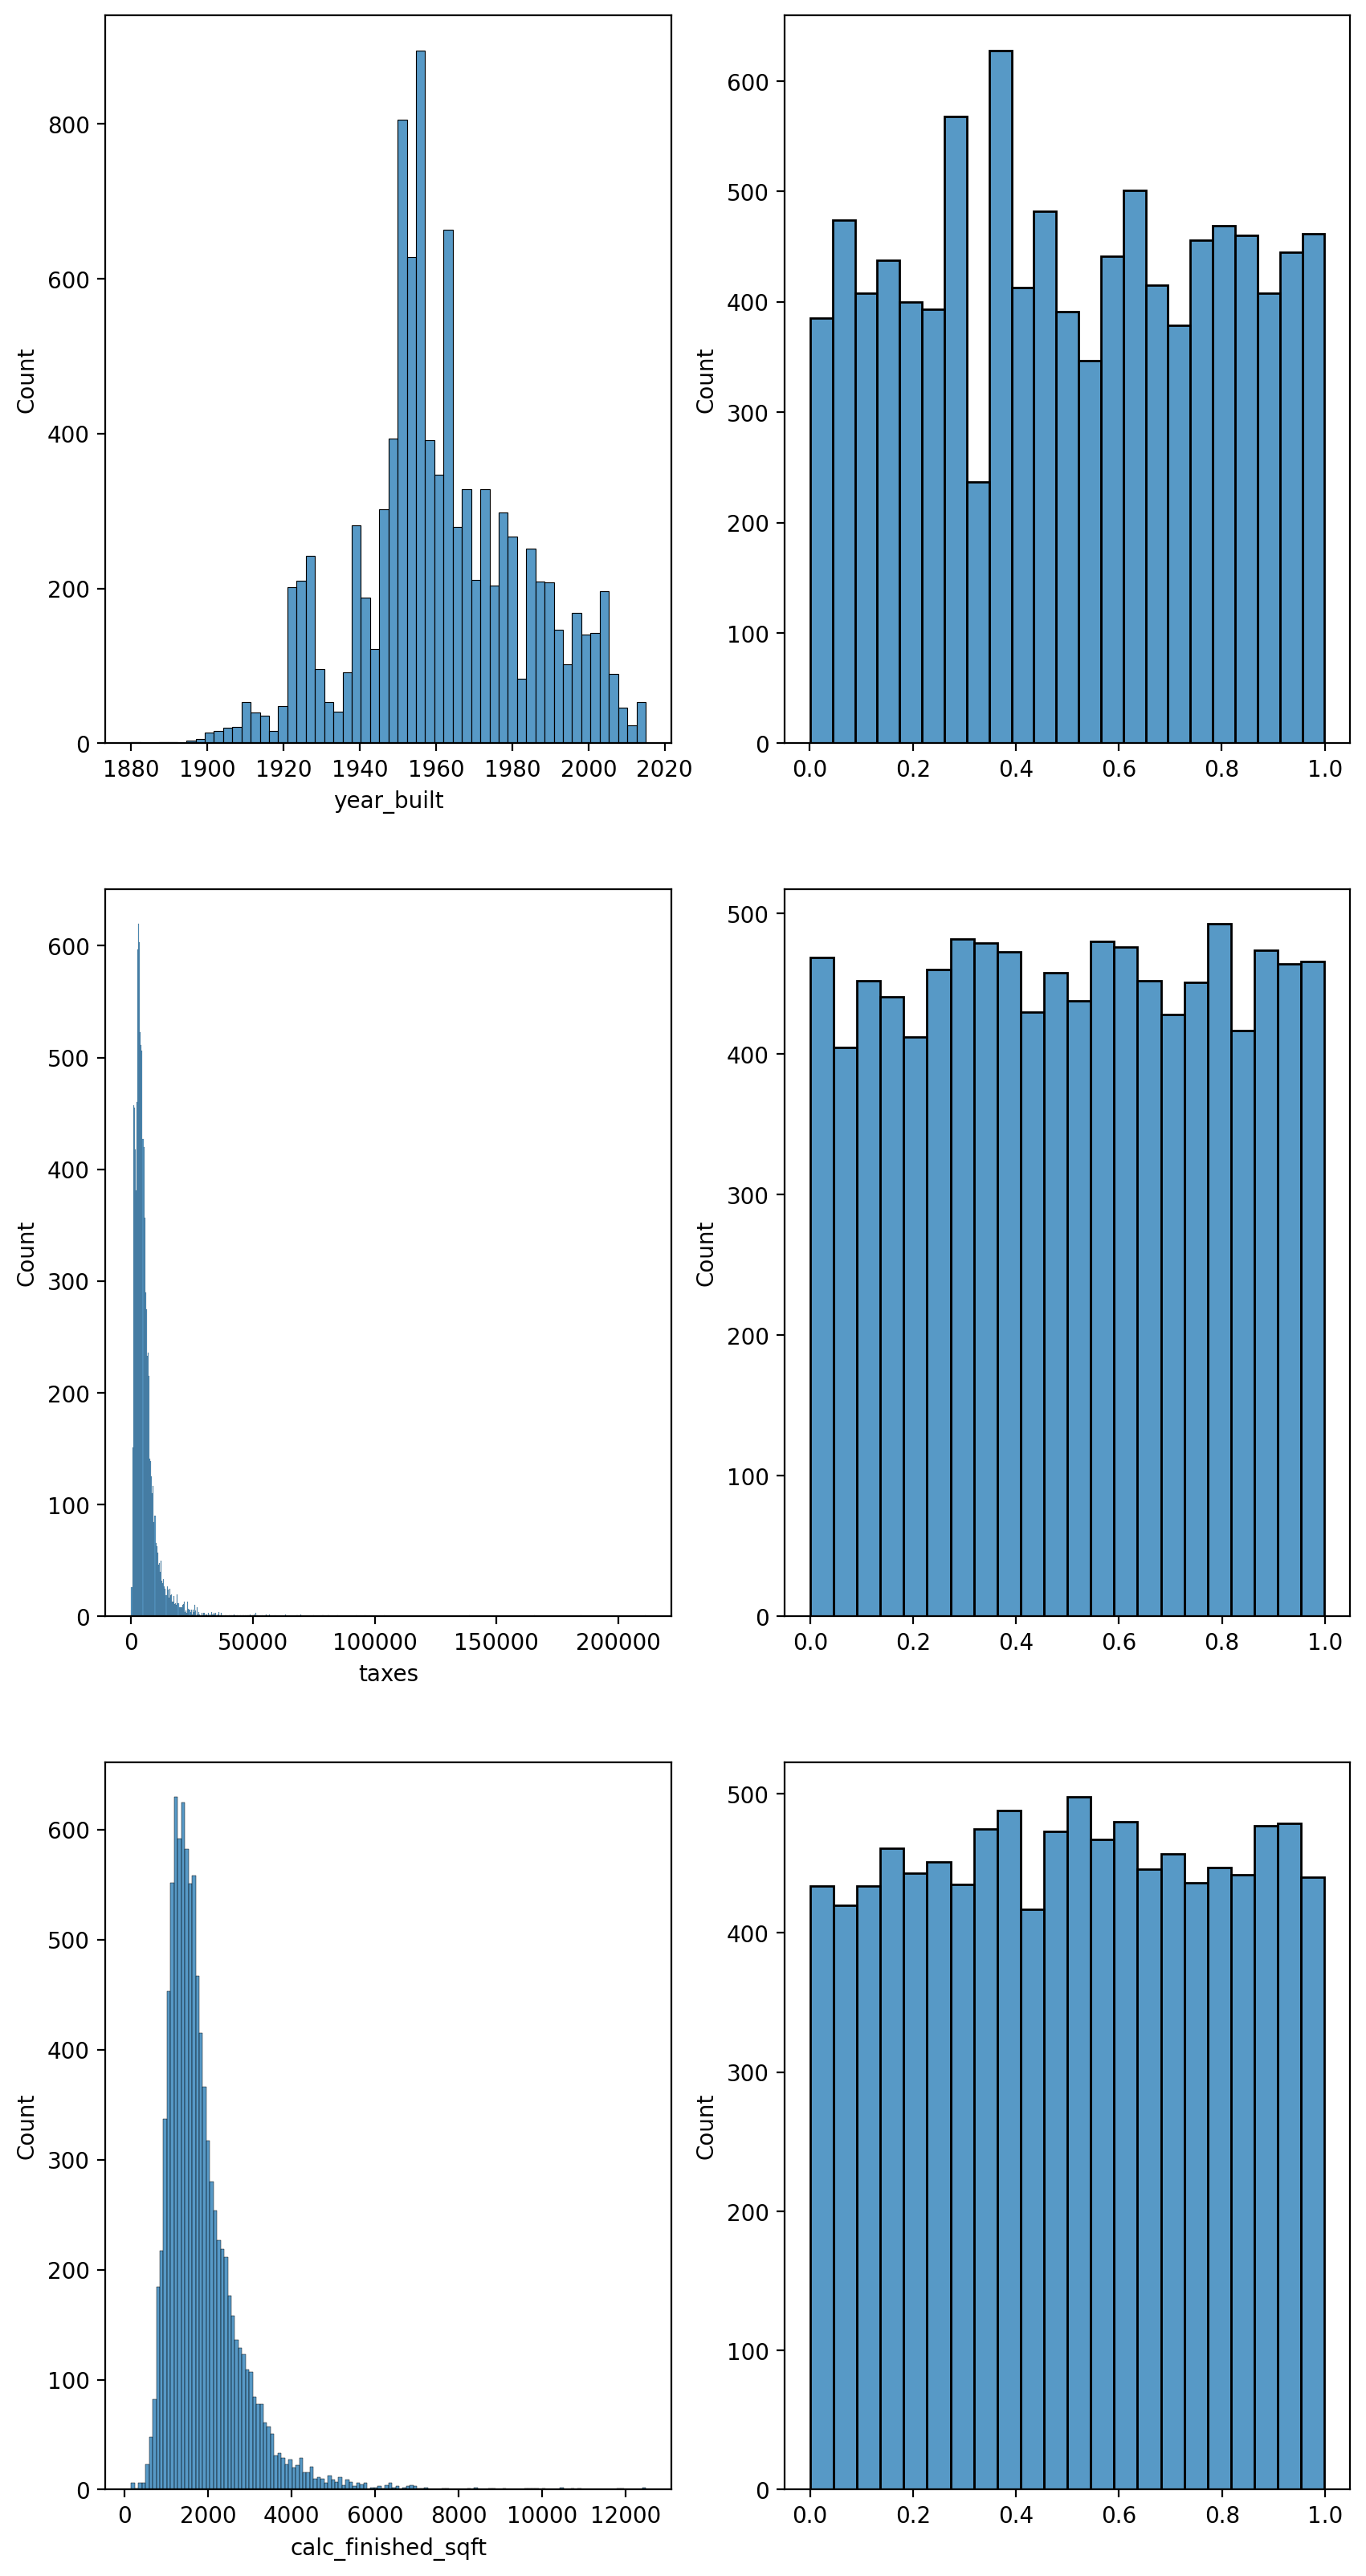

In [68]:
plt.figure(figsize=(10,20))
for i,v in enumerate(xtrain):
    plt_no = i * 2 + 1
    plt.subplot(3,2,plt_no)
    sns.histplot(xtrain[v].iloc[:10000])
    plt.subplot(3,2,plt_no+1)
    sns.histplot(scaled_xtrain[i][:10000])

Omitting the distribution argument causes the QuantileTransformer to use a uniform distribution.

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def scale_data(train,validate,test):
    scaler = RobustScaler()
    scaler.fit(train)
    ttrain = scaler.transform(train)
    tvalid = scaler.transform(validate)
    ttest = scaler.transform(test)
    return ttrain,tvalid,ttest